### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.metrics import mean_squared_error

### import data

In [8]:
# Reading data from given link
url = "http://bit.ly/w-data"
train = pd.read_csv(url)
train

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
train.shape

(25, 2)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [15]:
train.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
train.isnull().sum()

Hours     0
Scores    0
dtype: int64

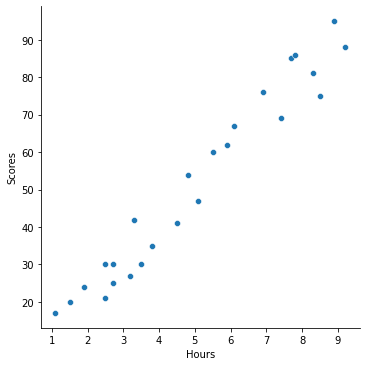

In [17]:
sns.relplot(x='Hours',y="Scores",data=train)

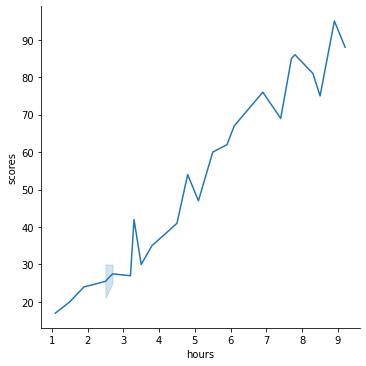

In [125]:
sns.relplot(x='hours',y="scores",data=train,kind='line')

In [11]:
c_matrix=train.corr()

In [12]:
sale_price_realations=c_matrix['Scores']
sale_price_realations.sort_values(ascending=False)

Scores    1.000000
Hours     0.976191
Name: Scores, dtype: float64

In [20]:
y=train['Scores']
X=train[['Hours']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [24]:
print(model.score(X_test,y_test)) 

0.9678055545167994


In [1]:
# from sklearn.metrics import r2_score
# predictions=model.predict(X_test)
# print(r2_score(y_test,predictions))

In [26]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

18.943211722315272
4.352380006653288


In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)

3.9207511902099244

In [28]:
sum(abs(predictions-y_test))/len(y_test)

3.9207511902099244

In [29]:
pred_5=model.predict(X_test[:5])
pred_5

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [30]:
np.array(y_test[:5])

array([81, 30, 21, 76, 62], dtype=int64)

In [31]:
model.predict([[9.25]])

array([92.38611528])

In [32]:
model.coef_

array([9.68207815])

In [33]:
model.intercept_

2.826892353899737

In [34]:
model.coef_*[[9.25]]+model.intercept_

array([[92.38611528]])

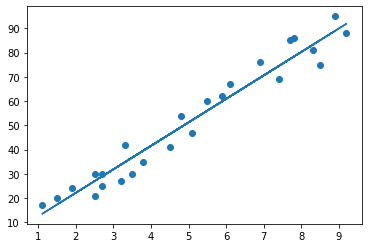

In [37]:
# Plotting the regression line
line = model.coef_*X+model.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()